<h1>Sub-task 1.1</h1>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import numpy as np
import ipyvolume as ipv

import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("regression1.csv", names=["value","response"])
data.head()

,value,response
0,0.43383,0.31047
1,-3.70230,12.49900
2,0.52219,0.67190
3,-3.50940,11.59400
4,-2.41450,10.46400


In [3]:
X = data["value"][:, np.newaxis]
Y = data["response"][:, np.newaxis]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,
                                                test_size = 0.33)
regr = LinearRegression(fit_intercept = True)
model = regr.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

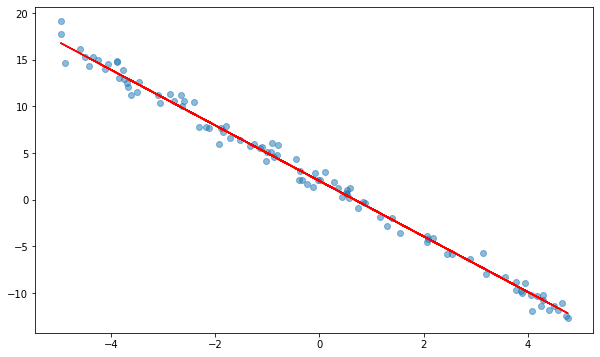

In [4]:
plt.figure(figsize = (10,6))
plt.scatter(X, Y, alpha = 0.5)
plt.plot(Xtest, y_pred, 'r-');
#linear_reg.jpg

In [5]:
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
print("Mean squared error:", mean_squared_error(ytest, y_pred))
print("R2:", r2_score(ytest, y_pred))

Intercept: [2.02189519]
Slope: [[-2.97410567]]
Mean squared error: 0.49332981639664597
R2: 0.9940188696124558


<h1>Sub-task 1.2</h1>

<h3>Data is imported</h3>

In [6]:
data = pd.read_csv("regression2.csv", names=["value_1","value_2","response"])
data.head()

,value_1,value_2,response
0,4.7720,-1.87800,45.480
1,4.3608,0.49696,85.031
2,3.9274,0.52582,76.012
3,-0.5647,1.40400,-31.961
4,2.5153,0.96649,30.361


In [7]:
data.describe(include = "all")

,value_1,value_2,response
count,500.000000,500.000000,500.000000
mean,0.233412,-0.019102,9.323165
std,2.903314,2.890870,47.539126
min,-4.999300,-4.989100,-138.930000
25%,-2.285350,-2.511675,-23.345750
50%,0.327460,-0.121155,5.001250
75%,2.706875,2.479325,42.488250
max,4.989400,4.977400,142.150000


<h3>Data is split and placed on a scatter graph</h3>

In [8]:
x = data.iloc[:,0].to_numpy(dtype=float)
y = data.iloc[:,1].to_numpy(dtype=float)
z = data.iloc[:,2].to_numpy(dtype=float)

fig = ipv.figure()
scatter = ipv.scatter(x,y,z, marker="sphere")
ipv.xyzlabel("value_1","value_2", "response")
ipv.xlim(xmin=-5.0, xmax=5.0)
ipv.ylim(ymin=-5, ymax=5.0)
ipv.zlim(zmin=-150.0, zmax=150.0)
ipv.show()
#scatter_plotted_1.jpg & scatter_plotted_2.jpg

In [9]:
X = data.drop("response", axis=1)
Y = data["response"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y,
                                                test_size = 0.33, random_state=0)
mlp_data_200 = pd.DataFrame(columns=['hidden_node_count', "training_mse", "testing_mse","r2_score"])
mlp_data_1000 = pd.DataFrame(columns=['hidden_node_count', "training_mse", "testing_mse","r2_score"])
mlp_data_4000 = pd.DataFrame(columns=['hidden_node_count', "training_mse", "testing_mse","r2_score"])

<h3>Finding the best maximum iteration to use</h3>

In [10]:
print("Node count")
for node in range(600,1020,20):
    reg = MLPRegressor(hidden_layer_sizes=(node,), max_iter=200, activation = "tanh", random_state=0)
    model = reg.fit(Xtrain,ytrain)
    
    y_pred_train =  model.predict(Xtrain)
    y_pred_test = model.predict(Xtest)
    
    mlp_data_200 = mlp_data_200.append({
        'hidden_node_count': node,
        'training_mse': mean_squared_error(ytrain,y_pred_train),
       'testing_mse': mean_squared_error(ytest, y_pred_test),
        'r2_score': r2_score(ytest, y_pred_test)
    }, ignore_index=True)

    reg = MLPRegressor(hidden_layer_sizes=(node,), max_iter=1000, activation = "tanh", random_state=0)
    model = reg.fit(Xtrain,ytrain)
    
    y_pred_train =  model.predict(Xtrain)
    y_pred_test = model.predict(Xtest)
    
    mlp_data_1000 = mlp_data_1000.append({
        'hidden_node_count': node,
        'training_mse': mean_squared_error(ytrain,y_pred_train),
        'testing_mse': mean_squared_error(ytest, y_pred_test),
        'r2_score': r2_score(ytest, y_pred_test)
    }, ignore_index=True)

    reg = MLPRegressor(hidden_layer_sizes=(node,), max_iter=4000, activation = "tanh", random_state=0)
    model = reg.fit(Xtrain,ytrain)
    
    y_pred_train =  model.predict(Xtrain)
    y_pred_test = model.predict(Xtest)
    
    mlp_data_4000 = mlp_data_4000.append({
        'hidden_node_count': node,
        'training_mse': mean_squared_error(ytrain,y_pred_train),
        'testing_mse': mean_squared_error(ytest, y_pred_test),
        'r2_score': r2_score(ytest, y_pred_test)
    }, ignore_index=True)
    
    print(node)


Node count
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000


Text(0.5, 0, 'Number of nodes')

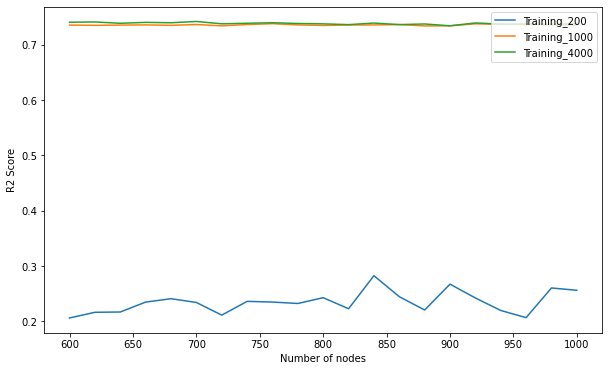

In [11]:
r2_fig = plt.figure(figsize = (10,6))
plt.plot(mlp_data_200["hidden_node_count"],mlp_data_200["r2_score"], label = 'Training_200')
plt.plot(mlp_data_1000["hidden_node_count"],mlp_data_1000["r2_score"], label = 'Training_1000')
plt.plot(mlp_data_4000["hidden_node_count"],mlp_data_4000["r2_score"], label = 'Training_4000')
plt.legend(loc="upper right")
plt.ylabel('R2 Score')
plt.xlabel('Number of nodes')
#R2_score.jpg

Text(0.5, 0, 'Number of nodes')

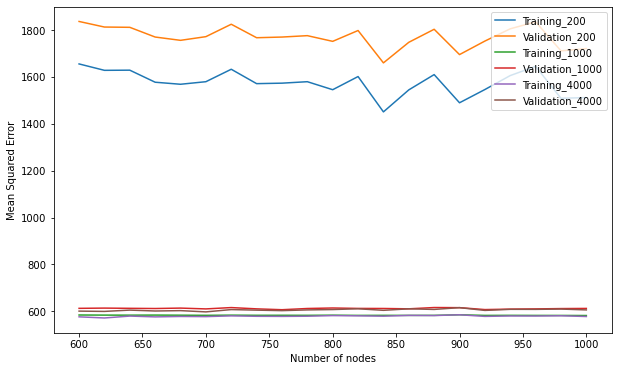

In [12]:
plt.figure(figsize = (10,6))
plt.plot(mlp_data_200["hidden_node_count"],mlp_data_200["training_mse"], label = 'Training_200')
plt.plot(mlp_data_200["hidden_node_count"],mlp_data_200["testing_mse"], label = 'Validation_200')
plt.plot(mlp_data_1000["hidden_node_count"],mlp_data_1000["training_mse"], label = 'Training_1000')
plt.plot(mlp_data_1000["hidden_node_count"],mlp_data_1000["testing_mse"], label = 'Validation_1000')
plt.plot(mlp_data_4000["hidden_node_count"],mlp_data_4000["training_mse"], label = 'Training_4000')
plt.plot(mlp_data_4000["hidden_node_count"],mlp_data_4000["testing_mse"], label = 'Validation_4000')
plt.legend(loc="upper right")
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of nodes')
#MSE.jpg

<h3>Finding the best node count</h3>

In [13]:
print("Node count with best MSE")
print(mlp_data_1000[mlp_data_1000.testing_mse == mlp_data_1000.testing_mse.min()])
print("Node count with best R2 score")
print(mlp_data_1000[mlp_data_1000.r2_score == mlp_data_1000.r2_score.max()])

Node count with best MSE
   hidden_node_count  training_mse  testing_mse  r2_score
8              760.0    582.769661    606.49737  0.737798
Node count with best R2 score
   hidden_node_count  training_mse  testing_mse  r2_score
8              760.0    582.769661    606.49737  0.737798


<h3>Using the best node count</h3>

In [14]:
reg = MLPRegressor(hidden_layer_sizes=(720,), max_iter=1000, random_state=0, activation = "tanh")

model = reg.fit(Xtrain,ytrain)
y_pred = model.predict(Xtest)

print("Mean Squared Error:",mean_squared_error(ytest, y_pred_test))
X = Xtest["value_1"].to_numpy(dtype=float)
Y = Xtest["value_2"].to_numpy(dtype=float)
Z = y_pred

Mean Squared Error: 605.6826415328733


<h3>Model predictions with test data visualised</h3>

In [15]:
fig = ipv.figure()
#scatter = ipv.scatter(x,y,z, marker="sphere", color="red")
scatter = ipv.scatter(X,Y,Z, marker="sphere", color="blue")
ipv.xyzlabel("value_1","value_2", "response")
ipv.xlim(xmin=-5.0, xmax=5.0)
ipv.ylim(ymin=-5.0, ymax=5.0)
ipv.zlim(zmin=-150.0, zmax=150.0)      
ipv.show()
#scatter_720_nodes_1.jpg & scatter_720_nodes_2.jpg

<h3>Model predictions compared with original data</h3>

In [16]:
fig = ipv.figure()
scatter = ipv.scatter(x,y,z, marker="sphere", color="red")
scatter = ipv.scatter(X,Y,Z, marker="sphere", color="blue")
ipv.xyzlabel("value_1","value_2", "response")
ipv.xlim(xmin=-5.0, xmax=5.0)
ipv.ylim(ymin=-5.0, ymax=5.0)
ipv.zlim(zmin=-150.0, zmax=150.0)      
ipv.show()
#model_orginal_scatter_1.jpg & model_orginal_scatter_2.jpg

<h3>Discussion</h3>
<p>I originally tested the MLPRegressor with varying maximum iterations (MI) at values 200, 1000, and 4000. A MI set to 200 would cause MSE to be large and R2 to be small even with a large increase in node size, increasing the maximum iteration allowed for a smaller MSE and larger R2. I noticed at 1000 MI, MSE and R2 score were almost identical to 4000 MI after 600 nodes, for this reason I choose to use 1000 MI as it required less computing power and time. The default activation function was RElu, this function created a linear regression for the response axis and value_1 axis as well as the response axis and value_2 axis when it was obvious that the original data set produced a 3D scatter graph that curved. To fix this I used the TanH activation function which also produced a lower MSE and higher R2 score. After testing node values at intervals of 20 from 600 to 1000 I found that the node with the best R2 score and MSE was 720. I limited testing to 1000 nodes to prevent overfitting the model. I plotted both the model predictions and the actual data onto a 3D scatter graph to compare visually compare them. The test data and original data fit the same pattern, so I think the number of nodes as well as parameters used were justified. The random state = 0 is used for the purpose of data and images provided to match up, it can be removed.</p>